In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import interpolate

In [2]:
def critical_point(n):
    return math.log(n)/n

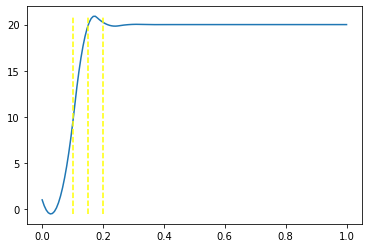

In [7]:
n = 20
repeat = 1000
steps = 15

xs = []
ys = []

for p in np.linspace(0.00, 1, num=steps):
    graph = nx.fast_gnp_random_graph(n, p)
    # return size of the biggest cluster
    biggest = len(max(nx.connected_components(graph)))
    ys.append(biggest)
    xs.append(p)


# smooth the curve
# note: curve my go a little higher or lower than the actual y range.
bspline = interpolate.interp1d(xs,ys, kind='quadratic')
x_new = np.linspace(0,1, 10*steps)
y_new = bspline(x_new)
plt.plot(x_new, y_new)

# offset for Pc
tp_offset = 0.05
turning_point = critical_point(n)
# plot Pc-offset, Pc, Pc+offset with height of min(0,y_value) and max(y_value). 
plt.vlines([turning_point-tp_offset, turning_point, turning_point+tp_offset],min(0,min(y_new)),max(y_new),  color='yellow',linestyles='dashed')

plt.show()

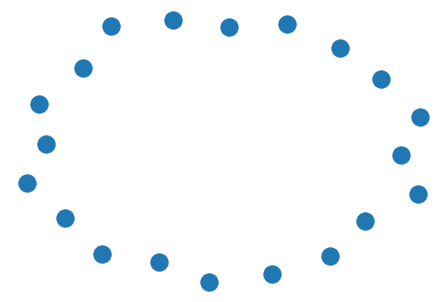

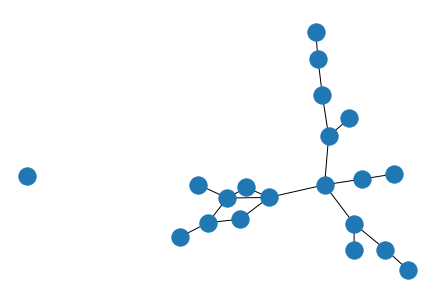

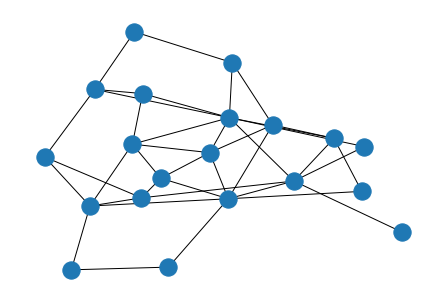

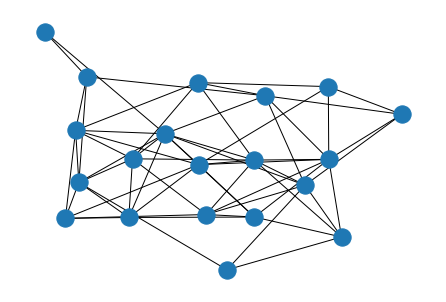

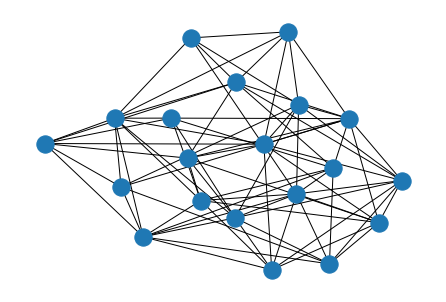

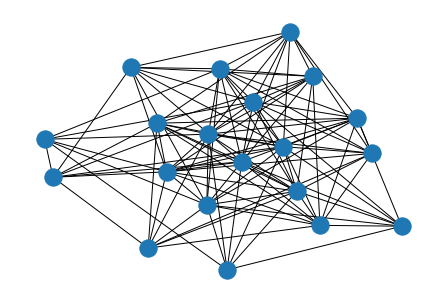

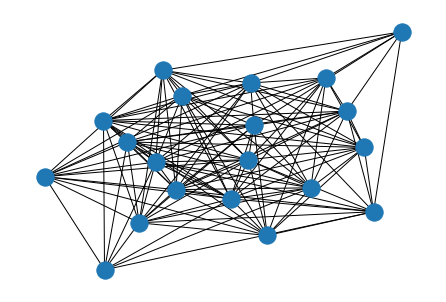

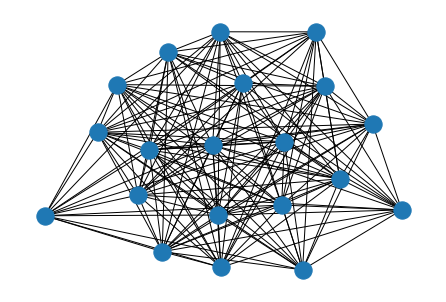

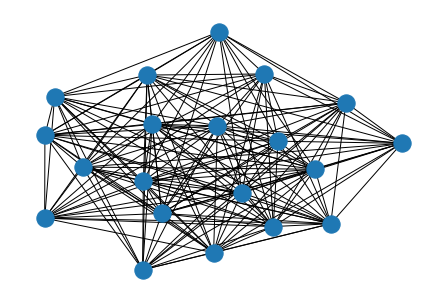

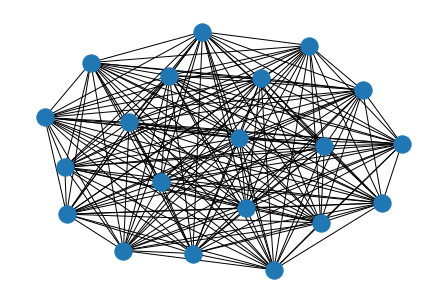

In [4]:
# displaying graph connectivity growth by increasing probability of having edge between 2 randomly selected node.
graph_display_steps = 10
for p in np.linspace(0.00, 1, num=graph_display_steps):
    graph = nx.fast_gnp_random_graph(n, p)
    nx.draw(graph)
    plt.pause(0.05)

plt.show()